<a href="https://colab.research.google.com/github/yeric1789/CMSC320_Final_Project/blob/main/NoteBookFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.utils import resample

In [107]:
sns.set_style("darkgrid")

#Loading the data 

In [108]:
# check if google colab is exist
try:
    from google.colab import drive
    IN_COLAB = True
except Exception as e:
    IN_COLAB = False
    pass

if IN_COLAB:
    drive.mount('/content/drive')
else:
    print("Not in colab")


Not in colab


In [110]:
path_use = "/content/drive/My Drive/Colab Notebooks/ML/Project/ProjectData.csv" if IN_COLAB else 'D:/CMSC320_XRAY_CHEST_DATA/Data_Entry_2017.csv'
data = pd.read_csv(path_use)
data = data.iloc[:4999] # We use a subset 
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


#Data exploration 
Each observation has an image and some more attributes attached to it, we will start by exploring some of the attributes first. 

In [111]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,0.0
mean,7.153431,664.016003,51.809362,2585.575115,2465.156431,0.157476,0.157476,NaN
std,11.211108,395.466319,17.015137,332.878470,392.205703,0.015117,0.015117,NaN
min,0.000000,1.000000,9.000000,1694.000000,1677.000000,0.115000,0.115000,NaN
25%,0.000000,318.000000,40.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,643.000000,54.000000,2500.000000,2500.000000,0.168000,0.168000,NaN
75%,8.000000,1021.500000,64.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,66.000000,1335.000000,94.000000,3056.000000,3056.000000,0.198800,0.198800,NaN


In [112]:
def count_disease(findings):
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [113]:
data['Finding Labels'] = data.apply(lambda x: x['Finding Labels'].split('|'),axis = 1)

# Count the different 
overview = {}
for findings in data['Finding Labels']:
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [114]:
overview

{'Cardiomegaly': 196,
 'Emphysema': 125,
 'Effusion': 487,
 'No Finding': 2754,
 'Hernia': 27,
 'Infiltration': 830,
 'Mass': 161,
 'Nodule': 214,
 'Atelectasis': 460,
 'Pneumothorax': 199,
 'Pleural_Thickening': 165,
 'Pneumonia': 65,
 'Fibrosis': 172,
 'Edema': 90,
 'Consolidation': 205}

Now we can create a one-hot encoding dataframe of all the labels being assigned to each image. After that it can be concatenated with the originial data matrix. 

In [115]:
dummies = pd.DataFrame(np.zeros((len(data), len(overview.keys())), dtype=np.int), columns=overview.keys())
for i,des in enumerate(data['Finding Labels']):
  dummies.loc[i][des] = 1

#Concat horizontally
data = pd.concat([data,dummies],axis=1)

C:\Users\noahc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Now let's see which diseases are the most common, by plotting a histogram. 

C:\Users\noahc\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Cardiomegaly'),
  Text(1, 0, 'Emphysema'),
  Text(2, 0, 'Effusion'),
  Text(3, 0, 'No Finding'),
  Text(4, 0, 'Hernia'),
  Text(5, 0, 'Infiltration'),
  Text(6, 0, 'Mass'),
  Text(7, 0, 'Nodule'),
  Text(8, 0, 'Atelectasis'),
  Text(9, 0, 'Pneumothorax'),
  Text(10, 0, 'Pleural_Thickening'),
  Text(11, 0, 'Pneumonia'),
  Text(12, 0, 'Fibrosis'),
  Text(13, 0, 'Edema'),
  Text(14, 0, 'Consolidation')])

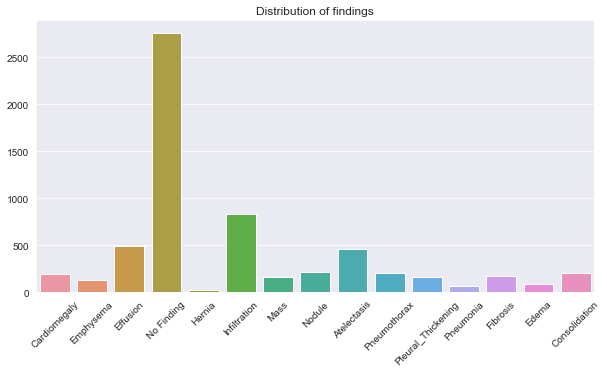

In [116]:
plt.rcParams["figure.figsize"] = (10,5)
x = list(overview.keys())
y = list(overview.values())
sns.barplot(x,y)
plt.title('Distribution of findings')
plt.xticks(rotation=45)

As can be seen there is a big class imbalance, so what we are going to do, is to resample everything that is not No finding. We will be using sklearns resampler in order to upsample the finding classes.

We are however dealing with two different types of classification binary and multi-label, for the binary case we don't really need to upsample the data. 

In [117]:
df_majority = data[data['No Finding']==1]
df_minority = data[data['No Finding']==0]

print(f'#No finding:{len(df_majority)} \n#Findings:{len(df_minority)}')
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority))
#data = pd.concat([df_minority_upsampled,data])

#No finding:2754 
#Findings:2245


In [118]:
plt.rcParams["figure.figsize"] = (10,5)
x = list(['Finding','No Finding'])
y = []
sns.barplot(x,y)
plt.title('Distribution of findings')
plt.xticks(rotation=45)

C:\Users\noahc\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyError: 'Finding'

Another thing our data accounts for is gender, so we can also vizualize if a Gender would have influence on how frequent a lung disese occurs. 

In [119]:
gender_df = data.groupby('Patient Gender').count()
gender_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
Patient Gender,,,,,,,,,,,,,,,,,,,,,
F,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,...,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391
M,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,...,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608


Now we can plot the correlation matrix, to check if any of the findings often occur togehter. Note that we have dropped *'No Finding'* since it will never occur together with any of the other variables. 

Text(0.5, 1.0, 'Correlation matrix of findings')

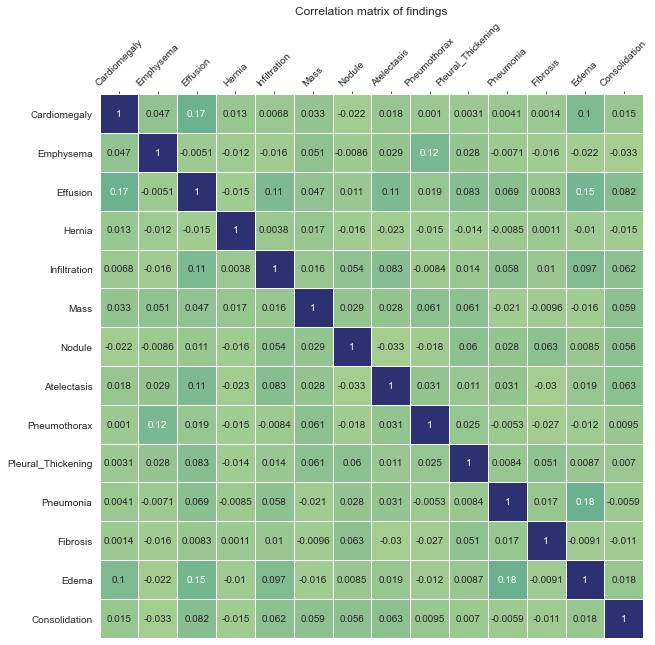

In [120]:
plt.rcParams["figure.figsize"] = (15,10)
df = dummies.drop(columns = 'No Finding').corr()
ax = sns.heatmap(df,annot = True,cmap="crest",square=True, linewidths=.5,cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.title('Correlation matrix of findings')

# Predicting the label from images. 

In [121]:
import torch 
from torchvision import datasets, transforms
from torchvision.models import inception_v3,resnext50_32x4d
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from torch import nn
import torch.functional as F
from tqdm.notebook import trange, tqdm
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR

In [122]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


First let us make sure that we make a trainning set and a testing set


In [123]:
train_df, test_df = train_test_split(data,test_size=0.15, random_state=42)

## Data handleing with pytorch

In order to work with pytorch and the image data, we have to create a costoum data-set. This is basically just a class, where you specify the __len__() and __getitem__() methods. Especially __getitem__() is important in this case, since we don't wan't to load all of the images into the ram at once. We are working with a big data-set and we can easily end up using all of the ram if we are not smart about how we do the loading of the data. 

The way we construct the data-set class is that each time the __getitem__() class is called it loads the image from the directory. This means that we only take images into the ram when we actually need them. 

Another thing we adress in this class is the construction of labels and transformations we apply to the images. We will be explaining two forms of classificatin binary and multi-label. The first method is quite a lot simpler than the second. 

###Binary
The way we can convert the problem to a binary problem is simply by only predicting if the image contains a finding or no finding, but not which specific finding that is being considered. 

### Multi-label 
Here we would actually try to predict which exact label to assign to given image.

The way this can be handled with pytorch is simply to create a binary variable indicating if we want to work with the binary data or the multi-label data. Notice how there is different if statements in the __getitem__() method. This allows us to only implement one class, instead of having to redefine the class. 

In [124]:
class LungDataSet(Dataset):
  
  def __init__(self,df,root_dir,input_size,transform = None,binary = True, cuda_device = None):
    self.df = df 
    self.root_dir = root_dir
    self.transform = transform
    self.input_size = input_size
    self.binary = binary
    self.cuda_device = cuda_device

  def __len__(self):
    return len(self.df)
  
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
            idx = idx.tolist()
    
    img_name = self.df.iloc[idx,0]
    path = os.path.join(self.root_dir,img_name)
    #print(path)

    image = io.imread(path)

    if len(image.shape)>2: # For some reason some of the images have copied slices of them self so they are 3d 
      image = image[:,:,0]

    image = torch.tensor([transform.resize(image, self.input_size) for i in range(3)]) # This is just me trying stuff 
    
    if image.shape == torch.Size([3, 299, 299, 4]):
      print(path)
    
    if self.binary:
      labels = self.df.iloc[idx,15] #12: if we use all labels
      labels = torch.tensor([1,0]) if labels.item() == 0 else torch.tensor([0,1]) # Notice how 0 in no finding means there is a finding
    else: 
      labels = self.df.iloc[idx,12:]
      labels = labels.to_list()
    
    labels = torch.tensor(labels).to(float)

    if self.cuda_device is not None:
      image = image.cuda()
      labels = labels.cuda()
    sample = {'image': image, 'labels': labels}

    if self.transform:
      sample = self.transform(sample)

    return sample 

In [130]:
dir = '/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/' if IN_COLAB else 'D:/CMSC320_XRAY_CHEST_DATA/images/'
train_set = LungDataSet(df = train_df,root_dir = dir,input_size = (299,299),binary = True, cuda_device=device)
test_set = LungDataSet(df = test_df,root_dir = dir,input_size = (299,299), cuda_device=device)

In [131]:
train_set[0]['labels']

C:\Users\noahc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AttributeError: 'LungDataSet' object has no attribute 'cuda_device'

## Visualize the data we will be training on 

<ipython-input-18-faf738d531c5>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  image = torch.tensor([transform.resize(image, self.input_size) for i in range(3)]) # This is just me trying stuff


0 torch.Size([3, 299, 299]) torch.Size([15])
1 torch.Size([3, 299, 299]) torch.Size([15])
2 torch.Size([3, 299, 299]) torch.Size([15])
3 torch.Size([3, 299, 299]) torch.Size([15])


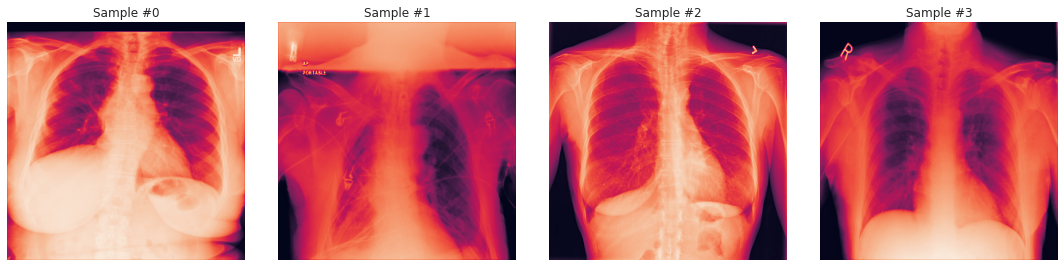

In [ ]:

def visualize(data):
    fig = plt.figure()
    for i in range(len(data)):
        sample = data[i]

        print(i, sample['image'].shape, sample['labels'].shape)

        ax = plt.subplot(1, 4, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(i))
        ax.axis('off')
        plt.imshow(sample['image'][0,:,:])

        if i == 3:
            plt.show()
            break

if device == "cuda":
    train_set2 = LungDataSet(df = train_df,root_dir = dir,input_size = (299,299),binary = True, cuda_device=None)
    test_set2 = LungDataSet(df = test_df,root_dir = dir,input_size = (299,299), cuda_device=None)
    visualize(train_set2)
else:
    visualize(train_set)

In [ ]:
#Train Loader 
train_dataloader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=0)

#Test Loader
test_dataloader = DataLoader(test_set, batch_size=1, shuffle=True, num_workers=0)

We will be using Resnet as the backbone for our image classifier, what this means is that we are using the pretrained weights for the architecture Resnet, and then we modify the last layer to be a linear classifier which will then output the desired number of output neurons we want. 

In the implementation below notice, how we again make sure that we can take a different number of classes, this is again in order to do both binary classification and multi-label classification. 

In [ ]:
class Resnext50(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        resnet = resnext50_32x4d(pretrained=True)
        resnet.fc = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=resnet.fc.in_features, out_features=n_classes)
        )
        self.n_classes = n_classes
        self.base_model = resnet
        self.sigm = nn.Sigmoid()
        self.softmax = nn.Softmax()
             
    def forward(self, x):
        if self.n_classes > 2:
          return self.sigm(self.base_model(x))
        else: 
          return self.softmax(self.base_model(x))

Define the actual objects. 

In [ ]:
model_res = Resnext50(n_classes =  2)
model_res = model_res.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Loss, optimizer and scheduler 
Define loss function and the optimizer, we will be using the Adam optimizer. The loss function will be binary cross-entropy. Another thing we will define is a scheduler, which allows us to addapt the learning rate of the optimizer for each epoch. We do this because we may be interested in having a higher lr in the beginning of the training, and then as we progress we want to take smaller and smaller steps in order to reduce the chance of overshooting the minima

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_res.parameters(), lr=1e-2)
scheduler = StepLR(optimizer, step_size=1, gamma=0.2)

## Model training
Training loop for the model. In this cell we will be training the model. This is doen by first calling `model.train()` which basically sets the model in training mode. After this is done, we want to make a prediction for each of the batches *(we are using stochastic gradient descent)* and then based of that predictin find the gradient so that we can optimize our network. The way we find the gradient is by calling `loss.backward()` this runs the back probagation algorithm. 

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    loss_tracker = []
    for batch, point in tqdm(enumerate(dataloader)):
        X = point['image']
        y = point['labels']

        X, y = X.to(device, dtype=torch.float), y.to(device, dtype=torch.float)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        loss_tracker.append(loss.item())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 5 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    return loss_tracker

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    predictions = []
    #f = nn.Softmax(dim = 1)
    with torch.no_grad():
        for point in dataloader:
            X = point['image'].to(torch.float32)
            y = point['labels'].to(torch.float32)

            X, y = X.to(device,dtype=torch.float), y.to(device,dtype=torch.float)
            pred = model(X)
            predictions.append((pred,y))
            #return pred, y 

            test_loss += loss_fn(pred, y).item()
            print(f'loss:{test_loss} \n Prediction:{pred}')
            correct += ((pred > 0.5 - y).sum().item()) == 0
            
    test_loss /= num_batches
    correct /= size
    print(correct)
    return test_loss,predictions

##Binary classification 
Now that we have the two functions defined we are ready to actually do the training, by calling the functions in another loop. Each iteration of a training loop, is known as an epoch. For each epoch we train we also want to validate if our model is overfitting or not, therefore we call the test function (we should prob rename). 

Notice that we in this loop also calls the `scheduler.step()` which tells the scheduler that it should decrease the learning rate by the ammount specified earlier as the gamma value. Further more we also incorporate an early stopping, meaning that if the current version of the model does not have improved test accuracy over the last two epochs we break it. The reason for this is that an increasing test performance is signaling that our model may be overfitting to the training data. 

In [ ]:
epochs = 15
train_loss = []
test_loss = []
predictions = []
for t in tqdm(range(epochs)):
  # Train
  epoch_train_loss = train(train_dataloader, model_res, loss_fn, optimizer)
  train_loss.append(epoch_train_loss)

  #Test
  epoch_test_loss, epoch_predictions = test(test_dataloader, model_res, loss_fn)
  test_loss.append(epoch_test_loss)
  predictions.append(epoch_predictions)

  # Decrease lr for each epoch. 
  scheduler.step()
  
  #Impose early stopping 
  if t > 2 and test_loss[-1] > test_loss[-2] and test_loss[-1] > test_loss[-3]:
    break 

In [ ]:
predictions

[[(tensor([[0.4688, 0.5312]], device='cuda:0'),
   tensor([[1., 0.]], device='cuda:0'))],
 [(tensor([[0.5279, 0.4721]], device='cuda:0'),
   tensor([[1., 0.]], device='cuda:0'))],
 [(tensor([[0.5953, 0.4047]], device='cuda:0'),
   tensor([[1., 0.]], device='cuda:0'))],
 [(tensor([[0.5030, 0.4970]], device='cuda:0'),
   tensor([[0., 1.]], device='cuda:0'))]]